In [17]:
from flame import Machine
from flame_utils import ModelFlame, BeamState, inspect_lattice

In [18]:
latfile = 'ReA3_LEBT_highacc.lat'

In [19]:
with open(latfile, 'rb') as f:
    m = Machine(f)

In [20]:
fm = ModelFlame()

ERROR: 2020-09-10 21:34:07,466: flame_utils.core.model: invalid file: None


In [21]:
bs = BeamState(machine=m)

In [22]:
fm.bmstate = bs
fm.machine = m

In [24]:
obs = fm.get_index_by_type(type='equad')['equad']
r, s = fm.run(monitor=obs)

In [25]:
data = fm.collect_data(r, pos=True, x0=True, y0=True)

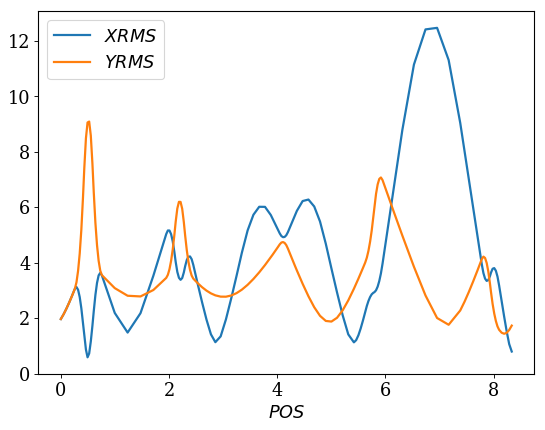

{'pos': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.05182   ,
         0.10364   ,  0.15546   ,  0.20728   ,  0.2591    ,  0.2591    ,
         0.2891    ,  0.3191    ,  0.3491    ,  0.3791    ,  0.4091    ,
         0.434     ,  0.464     ,  0.494     ,  0.524     ,  0.554     ,
         0.584     ,  0.6089    ,  0.6389    ,  0.6689    ,  0.6989    ,
         0.7289    ,  0.7589    ,  0.99678   ,  1.23466   ,  1.47254   ,
         1.71042   ,  1.9483    ,  1.9783    ,  2.0083    ,  2.0383    ,
         2.0683    ,  2.0983    ,  2.1232    ,  2.1532    ,  2.1832    ,
         2.2132    ,  2.2432    ,  2.2732    ,  2.2981    ,  2.3281    ,
         2.3581    ,  2.3881    ,  2.4181    ,  2.4481    ,  2.52972   ,
         2.61134   ,  2.69296   ,  2.77458   ,  2.8562    ,  2.8562    ,
         2.8562    ,  2.8562    ,  2.8562    ,  2.8562    ,  2.9541262 ,
         3.0520524 ,  3.1499786 ,  3.2479048

In [26]:
from phantasy.tools import plot_orbit
plot_orbit(('pos', 'xrms'), ('pos', 'yrms'), flame_model=fm)

In [27]:
# setup observers and run flame model
#obs = fm.get_index_by_type(type='bpm')['bpm']
#obs = fm.get_index_by_type(type='marker')['marker']
obs = range(len(fm.machine))
r,s = fm.run(monitor=obs)

# get data of interest from running results
data = fm.collect_data(r, pos=True, x0_env=True, x0_rms=True, y0_env=True, y0_rms=True, ref_IonEk=True)

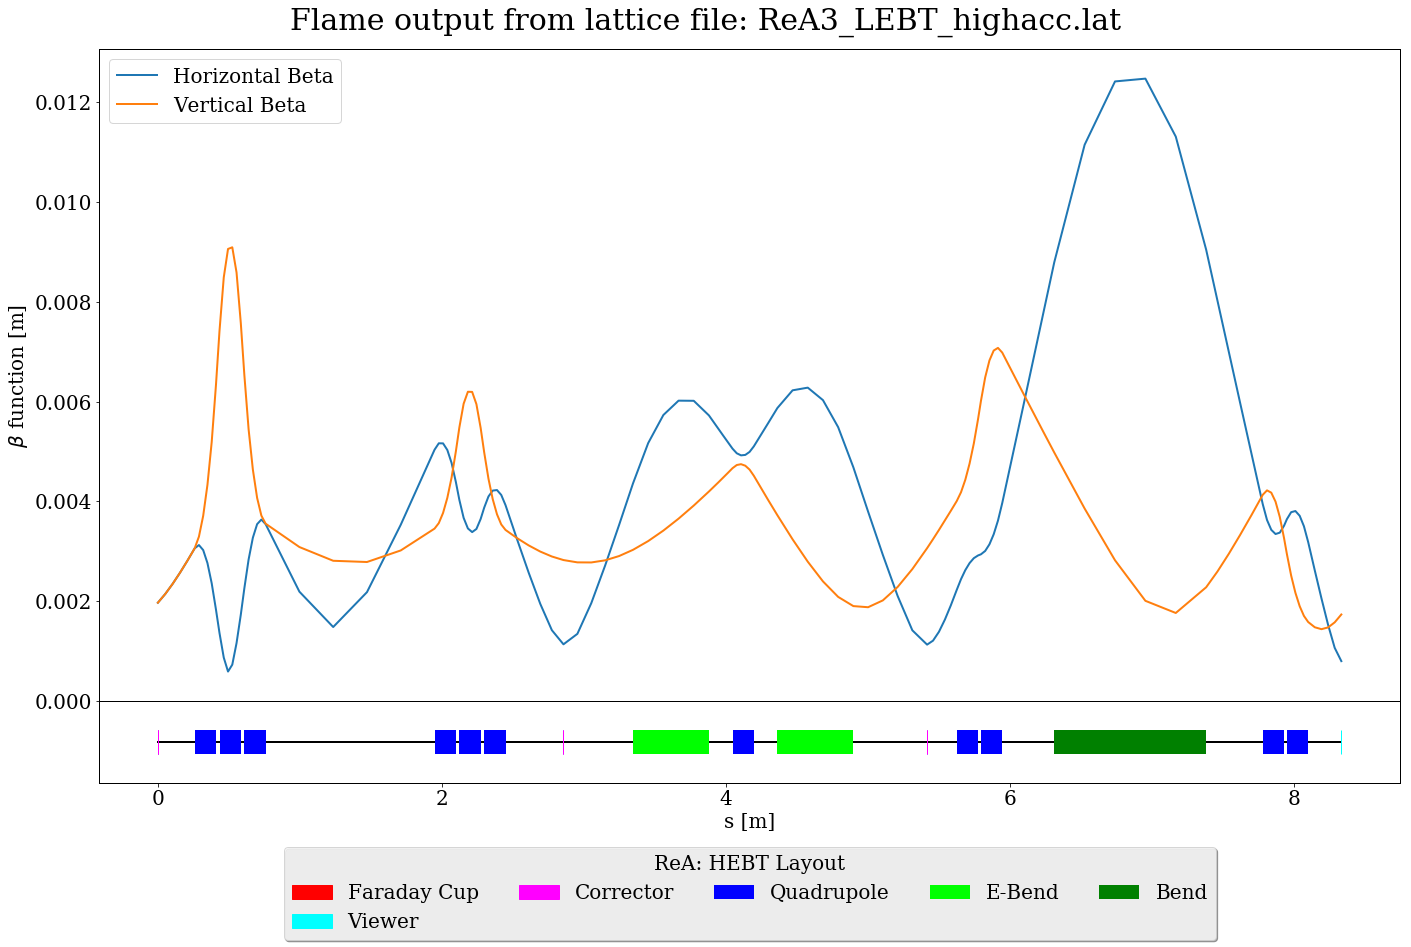

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

# Create, and show plot of beam envelope
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [20,12]
fig,(ax1,ax2)=plt.subplots(2, 1,gridspec_kw = {'height_ratios':[8,1]}, sharex=True)
fig.suptitle('Flame output from lattice file: ' + latfile, fontsize=30)

ax2,xmin,xmax,ymin,ymax = labframePlotFun.labframePlot(latfile, ax2, 0)
ax2.set_ylim([-1.0,1.0])
plt.setp(ax2, yticks=[])

ax1.plot(data['pos'], data['x0_rms']/1000.0, label='Horizontal Beta')
ax1.plot(data['pos'], data['y0_rms']/1000.0, label='Vertical Beta')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function [m]')
ax1.legend(loc='best')

fig.tight_layout(rect=(0,0,1,0.96))
plt.subplots_adjust(hspace=0.0)
plt.show()